In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [59]:
dt = pd.read_csv(r'C:\Users\NANDHINI SIVAKUMAR\Downloads\SD03Q014\houses_to_rent.csv')
#dt.head(10)

In [60]:
#dt.drop(dt[dt['floor'] == '-'].index, inplace = True)
dt["floor"].replace("-", 0, inplace=True)
#dt.head(10)

In [61]:
dt["floor"] = dt["floor"].astype("int")

In [62]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   city                10692 non-null  object
 1   area                10692 non-null  int64 
 2   rooms               10692 non-null  int64 
 3   bathroom            10692 non-null  int64 
 4   parking_spaces      10692 non-null  int64 
 5   floor               10692 non-null  int32 
 6   animal              10692 non-null  object
 7   furniture           10692 non-null  object
 8   hoa(R$)             10692 non-null  int64 
 9   rent_amount(R$)     10692 non-null  int64 
 10  property_tax(R$)    10692 non-null  int64 
 11  fire_insurance(R$)  10692 non-null  int64 
 12  total(R$)           10692 non-null  int64 
dtypes: int32(1), int64(9), object(3)
memory usage: 1.0+ MB


In [63]:
dt.shape
dt.describe()

,area,rooms,bathroom,parking_spaces,floor,hoa(R$),rent_amount(R$),property_tax(R$),fire_insurance(R$),total(R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [64]:
dt.isnull().values.any()

False

In [65]:
cor = dt.corr()
print(cor)

                        area     rooms  bathroom  parking_spaces     floor  \
area                1.000000  0.193796  0.226766        0.193983 -0.012724   
rooms               0.193796  1.000000  0.733763        0.617510 -0.078687   
bathroom            0.226766  0.733763  1.000000        0.697379  0.004894   
parking_spaces      0.193983  0.617510  0.697379        1.000000 -0.020767   
floor              -0.012724 -0.078687  0.004894       -0.020767  1.000000   
hoa(R$)             0.006890  0.007139  0.050271        0.009321  0.019872   
rent_amount(R$)     0.180742  0.541758  0.668504        0.578361  0.073596   
property_tax(R$)    0.039059  0.075252  0.109253        0.098378  0.012626   
fire_insurance(R$)  0.188078  0.565148  0.676399        0.597348  0.013652   
total(R$)           0.051799  0.134597  0.208339        0.148684  0.036431   

                     hoa(R$)  rent_amount(R$)  property_tax(R$)  \
area                0.006890         0.180742          0.039059   
rooms  

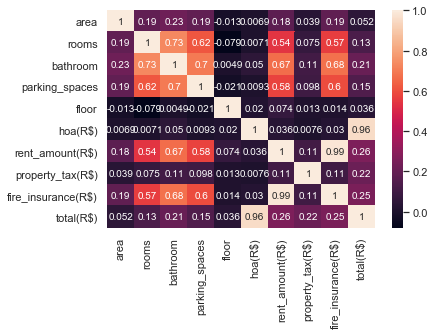

In [66]:
sns.heatmap(cor,annot=True)
plt.show()

Text(0.5, 1.0, 'Popular City among Brazilians')

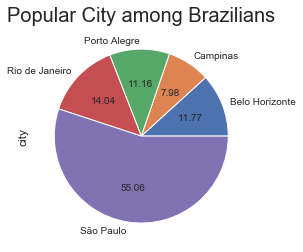

In [67]:
dt.groupby(['city'])['city'].aggregate(lambda x: x.count()/ 10692).plot(kind='pie',autopct='%.2f',fontsize=10)
plt.title("Popular City among Brazilians",fontsize=20)

Text(0.5, 1, 'Animal & Furniture')

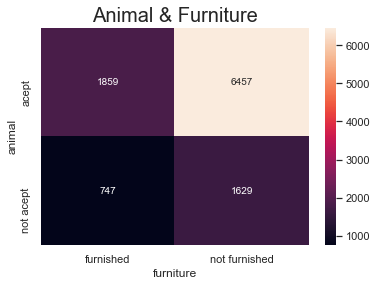

In [68]:
sns.heatmap(dt.groupby(['animal','furniture']).size().unstack(), annot=True, fmt="d")
plt.title("Animal & Furniture",fontsize=20)

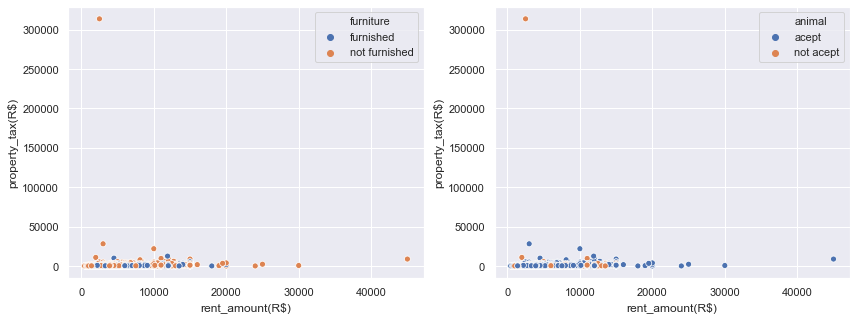

In [69]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
sns.scatterplot(data=dt, y='property_tax(R$)', x='rent_amount(R$)', hue="furniture", ax=axes[0])
sns.scatterplot(data=dt, y='property_tax(R$)', x='rent_amount(R$)', hue="animal", ax=axes[1])

C:\Users\NANDHINI SIVAKUMAR\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\NANDHINI SIVAKUMAR\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\NANDHINI SIVAKUMAR\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

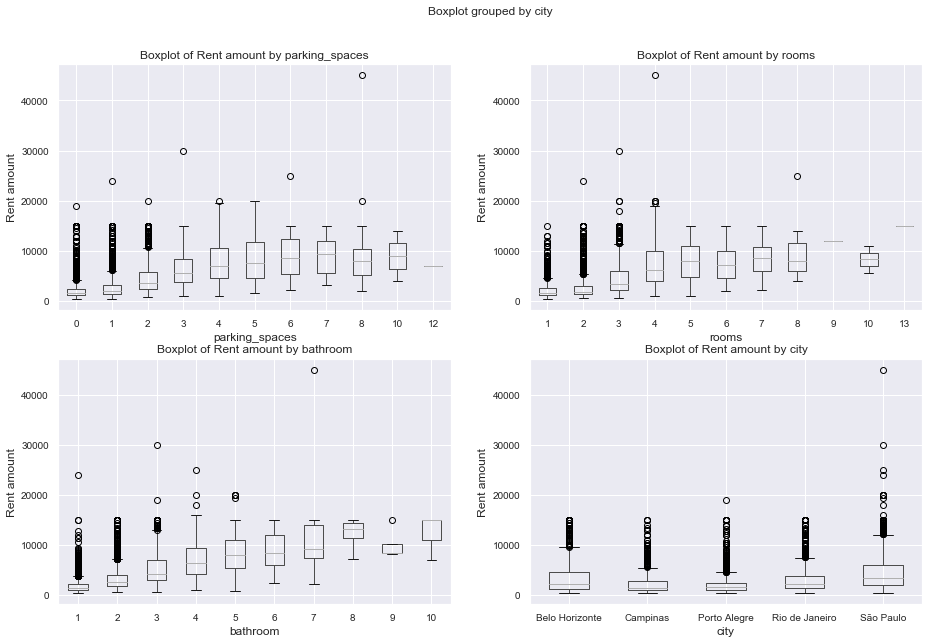

In [70]:
list_of_metrics = [['parking_spaces','rooms'], ['bathroom', 'city']]

def box_plot_func1(ax, metric):
    dt.boxplot(column='rent_amount(R$)', by=f'{metric}', fontsize=10, ax=ax);
    ax.set_title("Boxplot of Rent amount by " + f"{metric}")
    ax.set_xlabel(f"{metric}")
    ax.set_ylabel('Rent amount')
    #plt.suptitle("")
fig, axes = plt.subplots(2,2, figsize=(15,10))
box_plot_func1(axes[0,0], list_of_metrics[0][0])
box_plot_func1(axes[0,1], list_of_metrics[0][1])
box_plot_func1(axes[1,0], list_of_metrics[1][0])
box_plot_func1(axes[1,1], list_of_metrics[1][1])

C:\Users\NANDHINI SIVAKUMAR\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\NANDHINI SIVAKUMAR\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\NANDHINI SIVAKUMAR\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

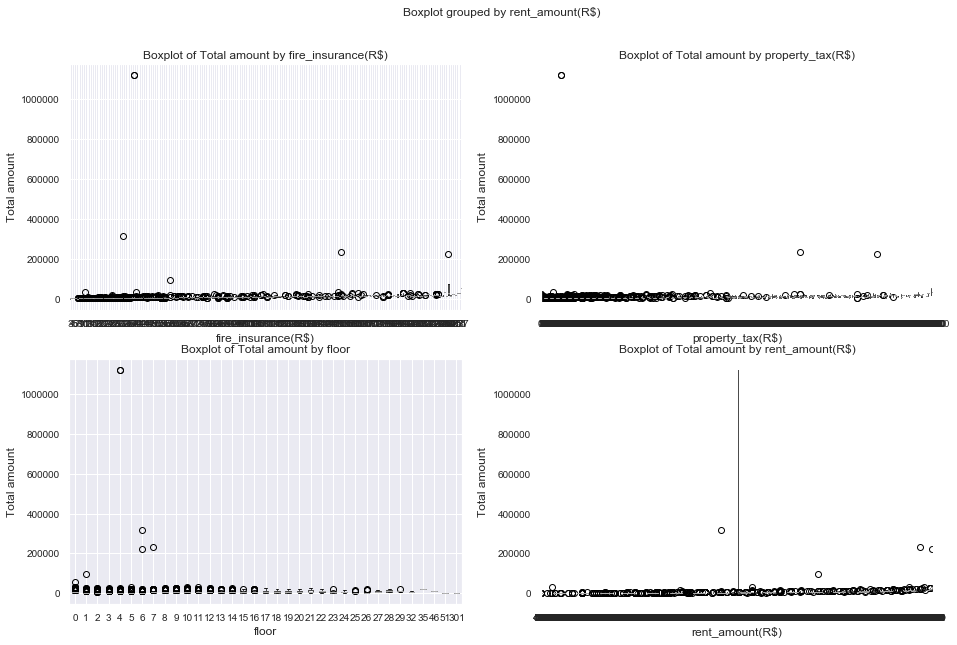

In [71]:
list_of_metrics = [['fire_insurance(R$)','property_tax(R$)'], ['floor', 'rent_amount(R$)']]

def box_plot_func2(ax, metric):
    dt.boxplot(column='total(R$)', by=f'{metric}', fontsize=10, ax=ax);
    ax.set_title("Boxplot of Total amount by " + f"{metric}")
    ax.set_xlabel(f"{metric}")
    ax.set_ylabel('Total amount')
    #plt.suptitle("")
fig, axes = plt.subplots(2,2, figsize=(15,10))
box_plot_func2(axes[0,0], list_of_metrics[0][0])
box_plot_func2(axes[0,1], list_of_metrics[0][1])
box_plot_func2(axes[1,0], list_of_metrics[1][0])
box_plot_func2(axes[1,1], list_of_metrics[1][1])

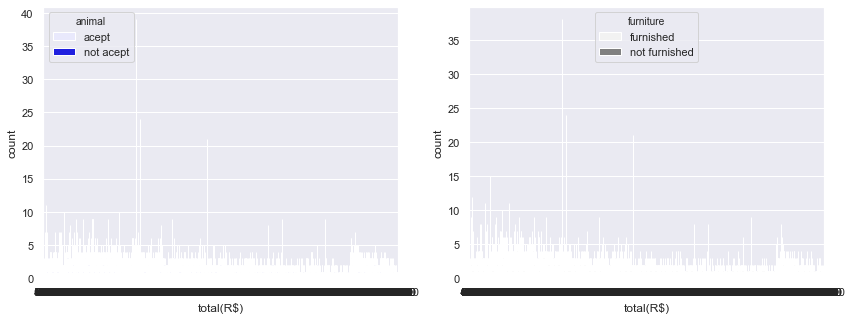

In [72]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
sns.countplot(x='total(R$)', hue='animal', data=dt, ax=axes[0], color="Blue");
sns.countplot(x='total(R$)', hue='furniture', data=dt, ax=axes[1], color="Grey");

In [73]:
dt_group = dt.groupby(["city"])[["area","rooms","bathroom","floor"]].aggregate(lambda x: x.mean())
dt_group

,area,rooms,bathroom,floor
city,,,,
Belo Horizonte,207.411765,3.020668,2.402226,3.860890
Campinas,137.561547,2.355217,1.960141,4.280188
Porto Alegre,103.609388,2.140821,1.725901,3.918692
Rio de Janeiro,105.347768,2.243837,1.756163,5.250500
São Paulo,158.899439,2.558859,2.467641,5.626465


<BarContainer object of 5 artists>

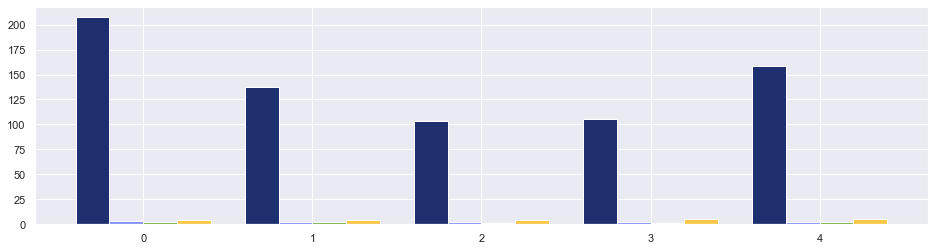

In [74]:
fig, ax = plt.subplots(1, figsize=(16, 4))
x = np.arange(0, len(dt_group.index))
plt.bar(x - 0.3, dt_group["area"], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, dt_group["rooms"], width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, dt_group["bathroom"], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, dt_group["floor"], width = 0.2, color = '#FAC748')

Text(0.5, 1.0, 'Average area in a city')

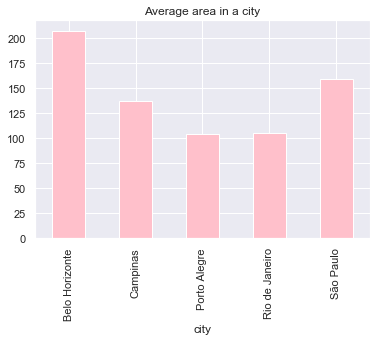

In [75]:
dt.groupby(['city'])['area'].aggregate(lambda x: x.mean()).plot(kind="bar",color="Pink")
plt.title("Average area in a city", fontsize=12)

Text(0.5, 1.0, 'Average number of rooms of a house in each city')

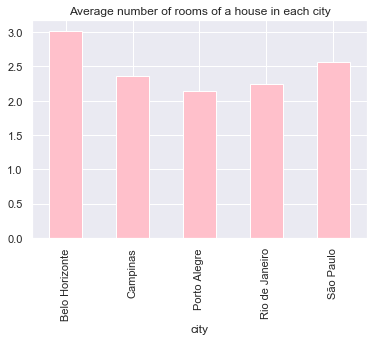

In [76]:
dt.groupby(['city'])['rooms'].aggregate(lambda x: x.mean()).plot(kind='bar',color="Pink")
plt.title('Average number of rooms of a house in each city', fontsize=12)

Text(0.5, 1.0, 'Maximum number of rooms of a house in each city')

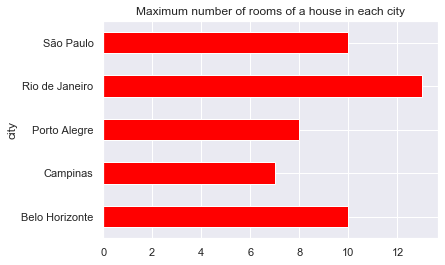

In [77]:
dt.groupby(['city'])['rooms'].aggregate(lambda x: x.max()).plot(kind='barh',color="Red")
plt.title('Maximum number of rooms of a house in each city', fontsize=12)

In [78]:
dt.isna().sum()

city                  0
area                  0
rooms                 0
bathroom              0
parking_spaces        0
floor                 0
animal                0
furniture             0
hoa(R$)               0
rent_amount(R$)       0
property_tax(R$)      0
fire_insurance(R$)    0
total(R$)             0
dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
del dt['total(R$)']
x, y = dt.drop('rent_amount(R$)',axis=1), dt['rent_amount(R$)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f'x train shape: {x_train.shape}, x test shape: {x_test.shape}')

x train shape: (8553, 11), x test shape: (2139, 11)


In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train.loc[:,'city'] = le.fit_transform(x_train['city'])
x_test.loc[:,'city'] = le.transform(x_test['city'])
x_train.loc[:,'animal'] = le.fit_transform(x_train['animal'])
x_test.loc[:,'animal'] = le.transform(x_test['animal'])
x_train.loc[:,'furniture'] = le.fit_transform(x_train['furniture'])
x_test.loc[:,'furniture'] = le.transform(x_test['furniture'])

C:\Users\NANDHINI SIVAKUMAR\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


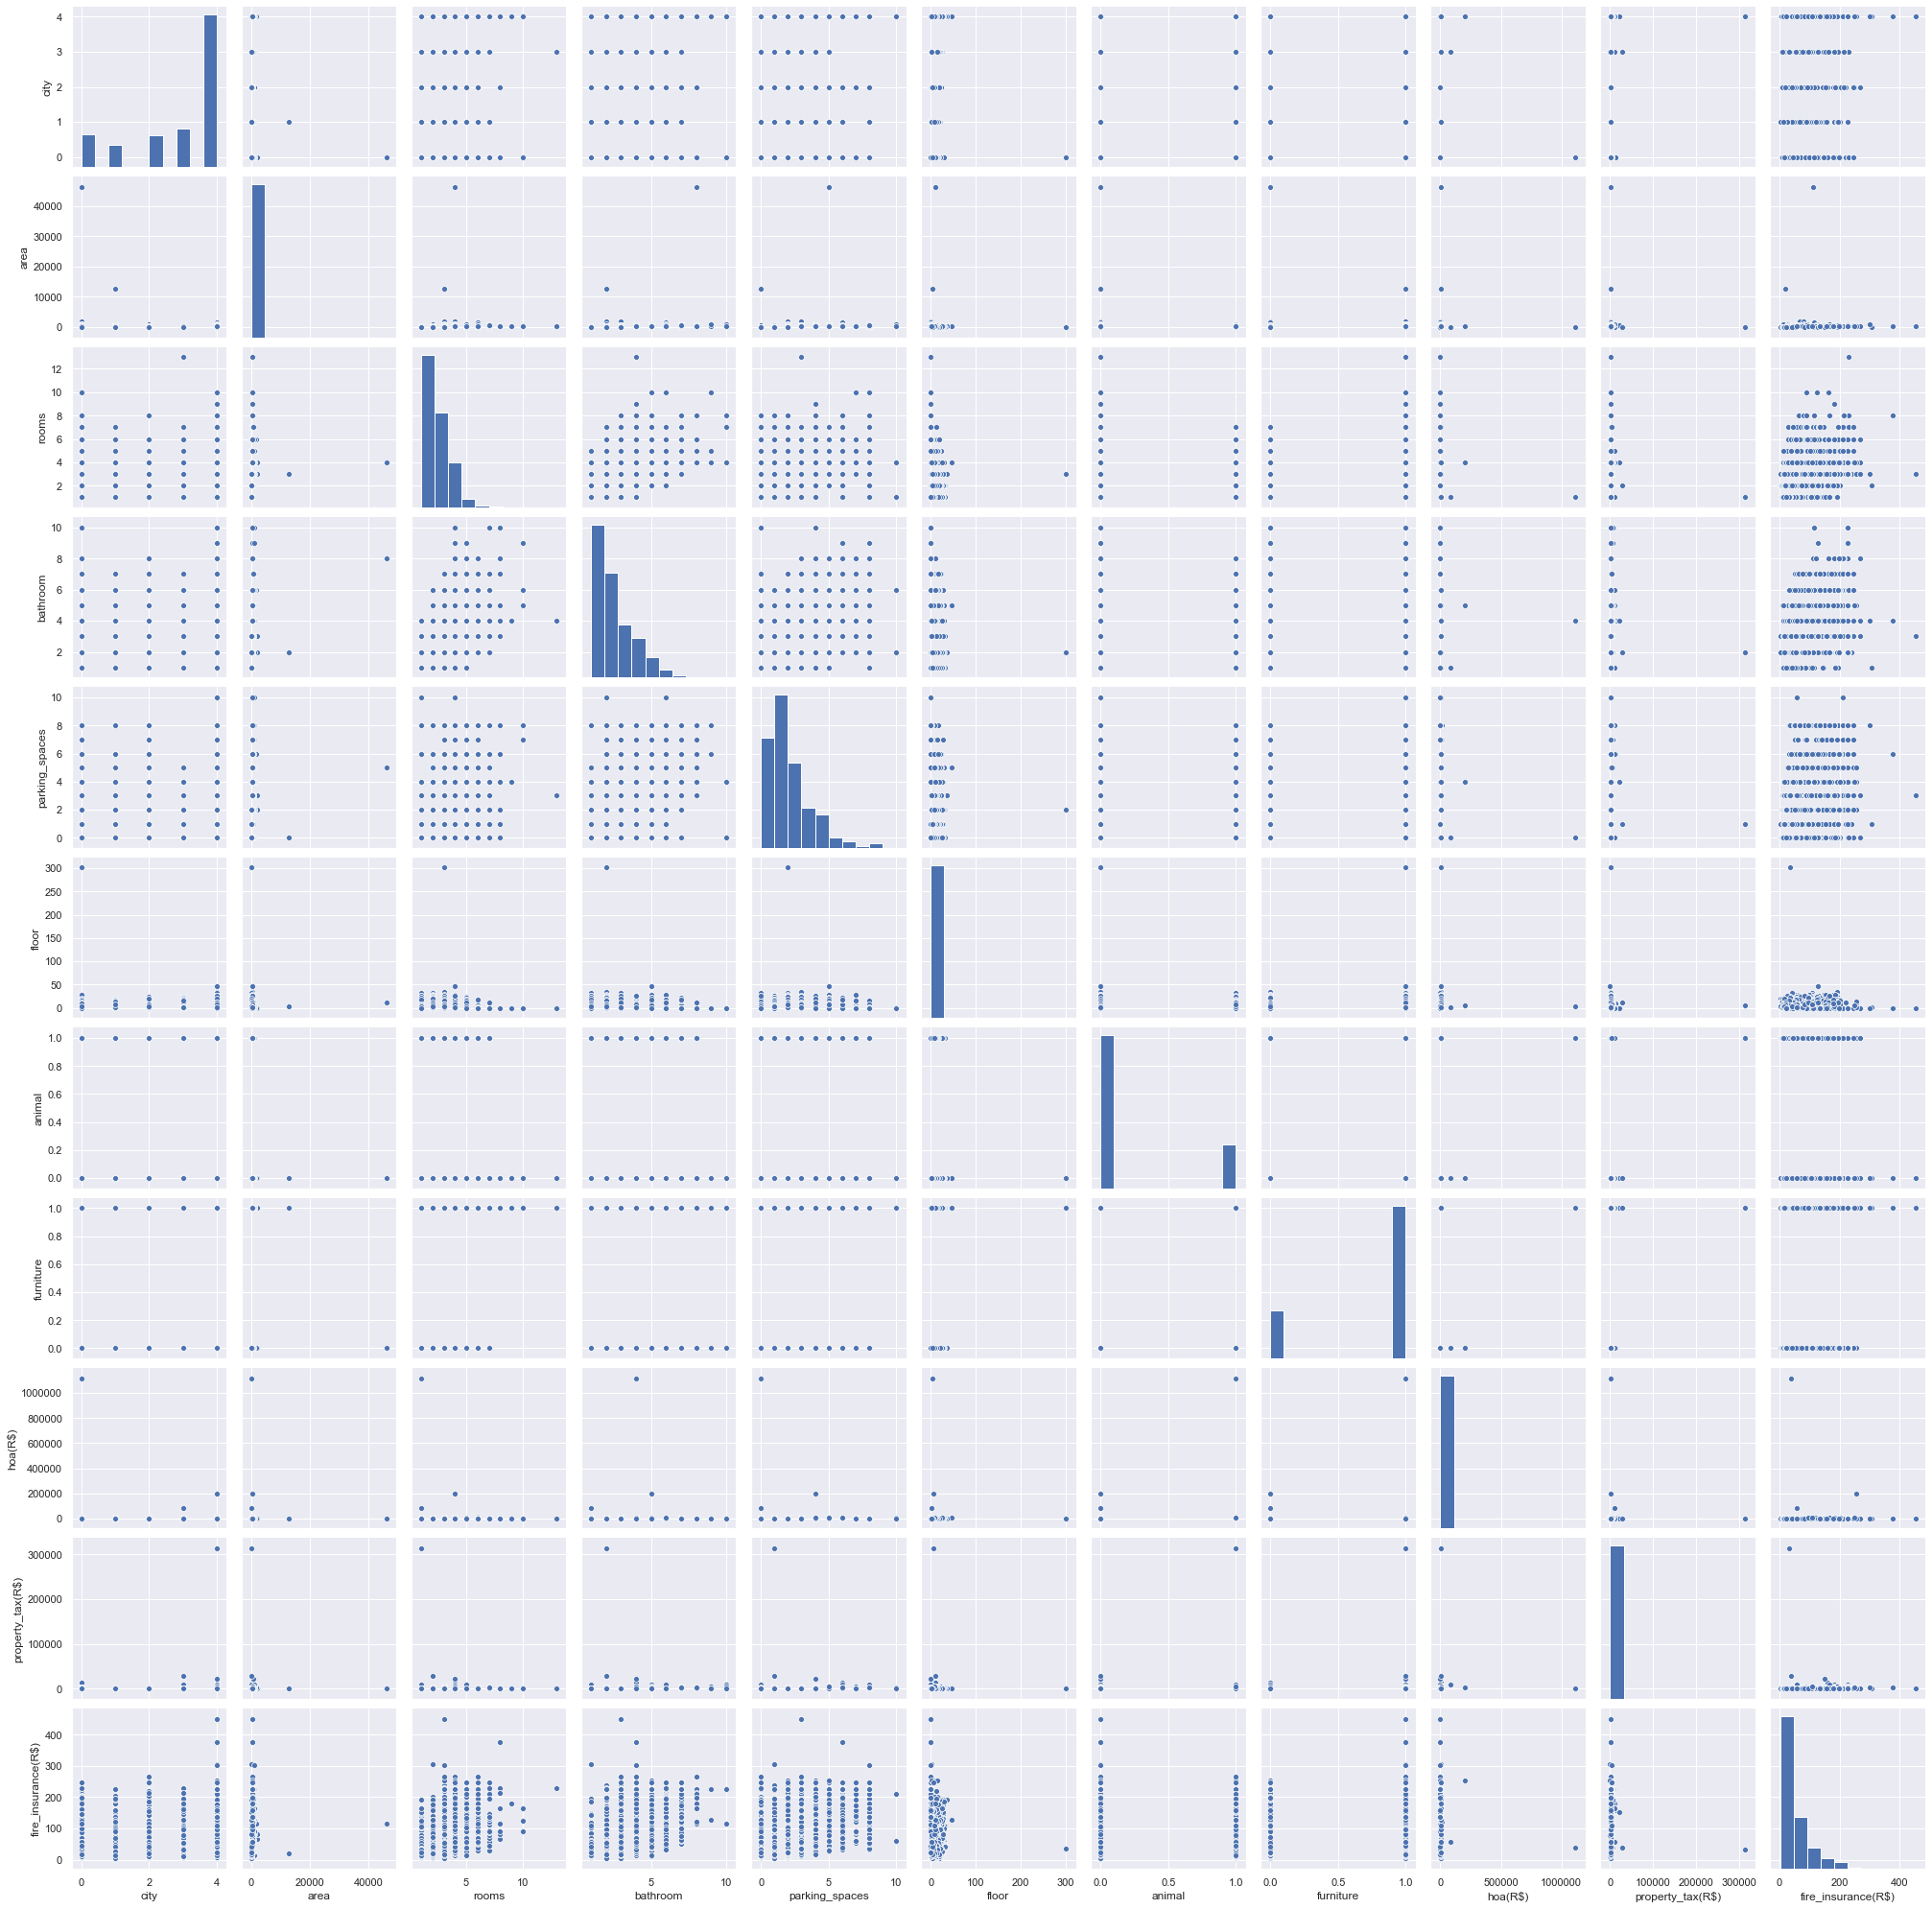

In [81]:
sns.pairplot(x_train)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
x = dt[["area","rooms","bathroom","parking_spaces","hoa(R$)","property_tax(R$)","fire_insurance(R$)"]]
y = dt[["rent_amount(R$)"]]
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_train_lr = lr.predict(x_train)
pred_test_lr = lr.predict(x_test)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
print("RMSE and r-square for train set:")
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train,pred_train_lr))
print("RMSE and r-square for test set:")
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print(r2_score(y_test,pred_test_lr))

RMSE and r-square for train set:
487.4843972042006
0.9796423951399171
RMSE and r-square for test set:
443.6687585808533
0.9827095140370461
